# importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load Data

In [2]:
data=pd.read_csv('input/data.csv')


In [3]:
data.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28/02/2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28/02/2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28/02/2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28/02/2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28/02/2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [4]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d-%m-%Y %H:%M')


In [7]:
data['timestamp']

0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
               ...        
2085   2018-07-03 03:50:00
2086   2018-07-03 21:10:00
2087   2018-07-03 12:10:00
2088   2018-07-03 10:35:00
2089   2018-07-03 23:45:00
Name: timestamp, Length: 2090, dtype: datetime64[ns]

In [8]:
# DATE TIME STAMP FUNCTION
column_1 = data.iloc[:,0]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [9]:
dataset1=data.drop('timestamp',axis=1)

In [10]:
data1=pd.concat([db,dataset1],axis=1)

## Data Analysis

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
year          2090 non-null int64
month         2090 non-null int64
day           2090 non-null int64
hour          2090 non-null int64
dayofyear     2090 non-null int64
week          2090 non-null int64
weekofyear    2090 non-null int64
dayofweek     2090 non-null int64
weekday       2090 non-null int64
quarter       2090 non-null int64
act379        2090 non-null int64
act13         2090 non-null int64
act279        2090 non-null int64
act323        2090 non-null int64
act363        2090 non-null int64
act302        2090 non-null int64
latitude      2090 non-null float64
longitude     2090 non-null float64
dtypes: float64(2), int64(16)
memory usage: 294.0 KB


In [12]:
data1.dropna(inplace=True)

In [13]:
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018,2,28,21,59,9,9,2,2,1,1,0,0,0,0,0,22.737260,75.875987
1,2018,2,28,21,59,9,9,2,2,1,1,0,0,0,0,0,22.720992,75.876083
2,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.736676,75.883168
3,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.746527,75.887139
4,2018,2,28,10,59,9,9,2,2,1,0,0,1,0,0,0,22.769531,75.888772


## Data Visualization & Analysis

C:\Users\aliju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aliju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


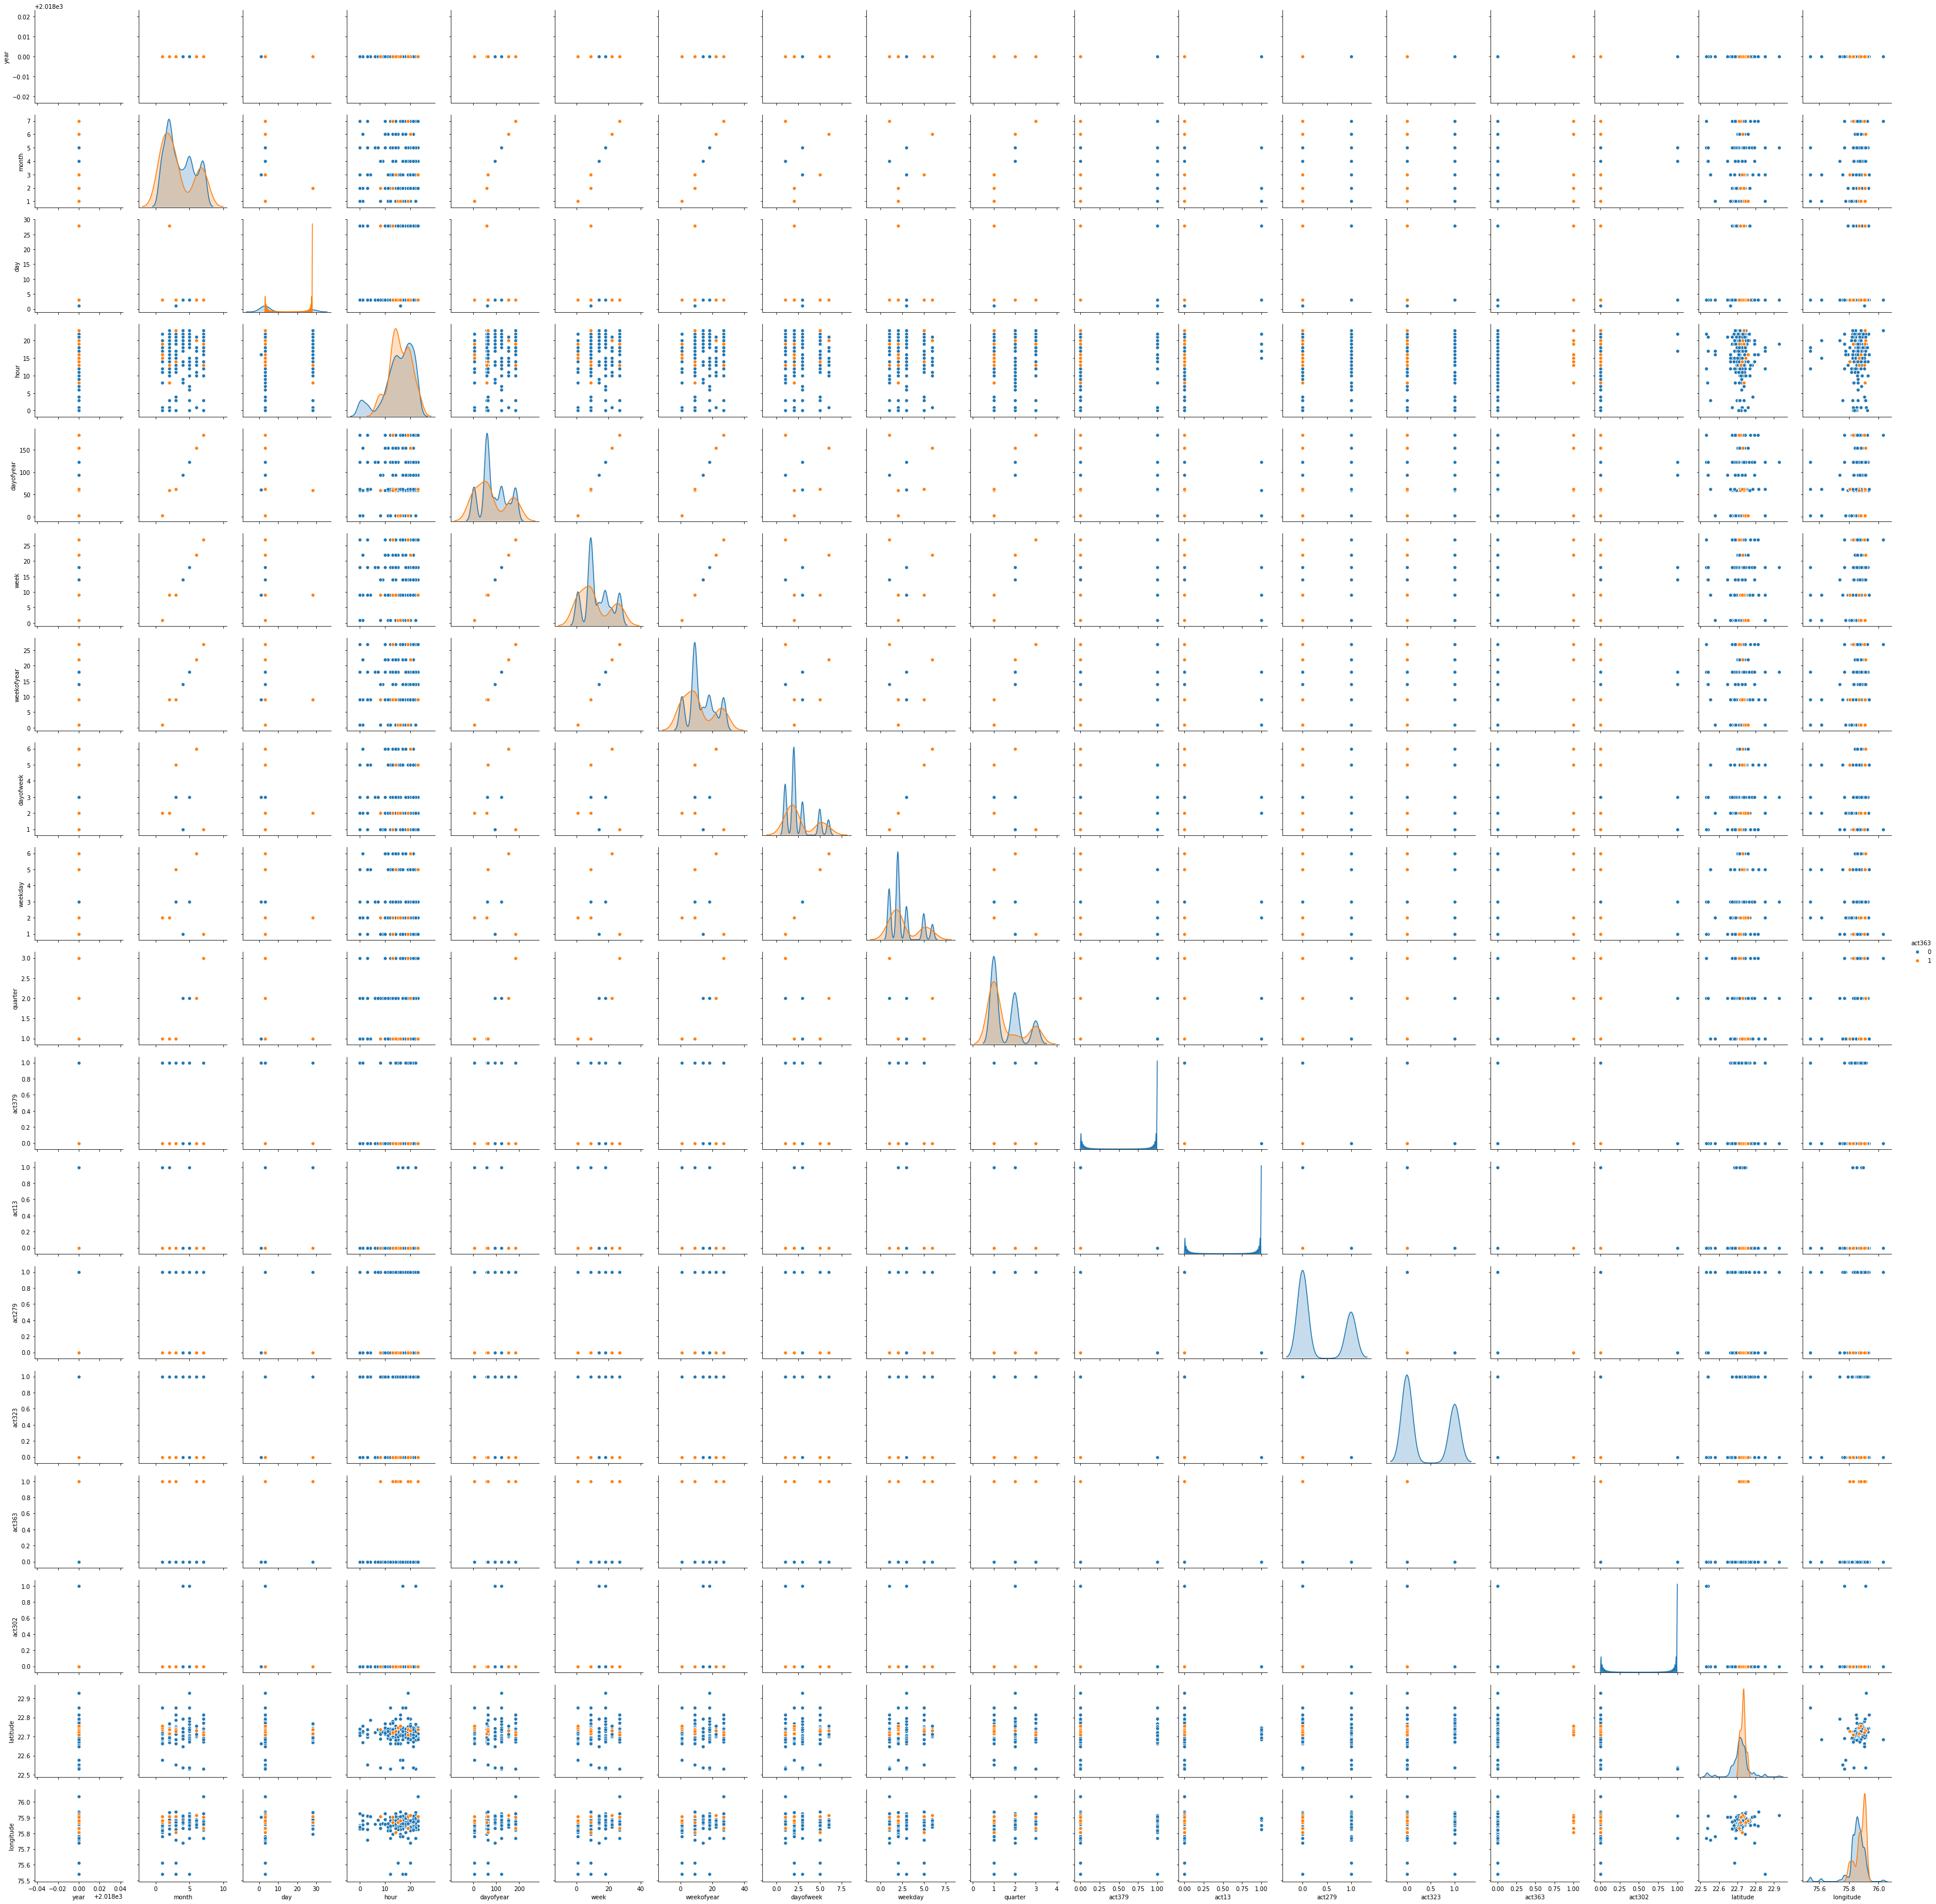

In [14]:
sns.pairplot(data1,hue='act363')

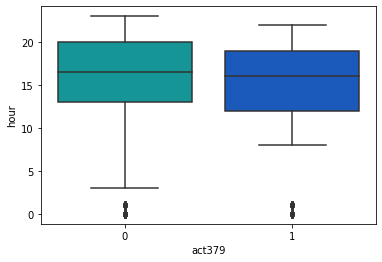

In [15]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')

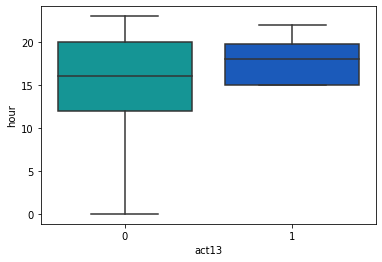

In [16]:
sns.boxplot(x='act13' ,y='hour' ,data=data1 , palette='winter_r')

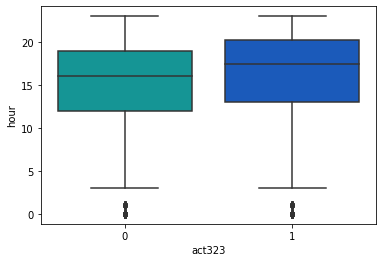

In [17]:
sns.boxplot(x='act323' ,y='hour' ,data=data1, palette='winter_r')

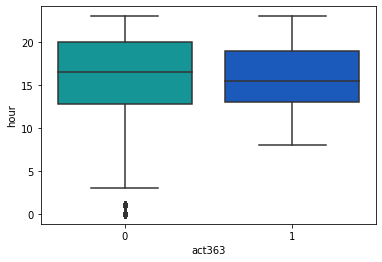

In [18]:
sns.boxplot(x='act363' ,y='hour' ,data=data1, palette='winter_r')

In [19]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])

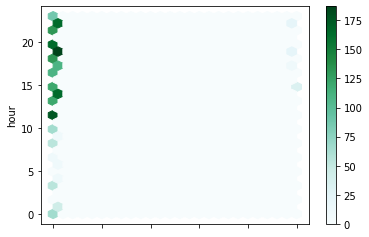

In [20]:
df.plot.hexbin(x='act13',y='hour',gridsize=25)

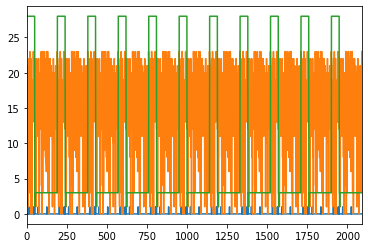

In [21]:
df.plot(legend=False)

In [22]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

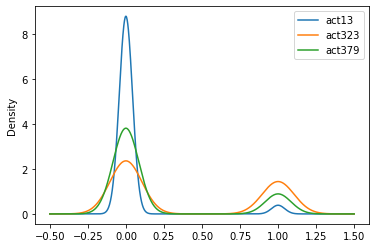

In [23]:
df1.plot.kde()

## Feature Selection

In [24]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values


In [25]:
X

array([[ 2.      , 28.      , 21.      , ...,  9.      , 22.73726 ,
        75.875987],
       [ 2.      , 28.      , 21.      , ...,  9.      , 22.720992,
        75.876083],
       [ 2.      , 28.      , 10.      , ...,  9.      , 22.736676,
        75.883168],
       ...,
       [ 7.      ,  3.      , 12.      , ..., 27.      , 22.531931,
        75.769126],
       [ 7.      ,  3.      , 10.      , ..., 27.      , 22.719569,
        75.857726],
       [ 7.      ,  3.      , 23.      , ..., 27.      , 22.686437,
        76.032055]])

In [26]:
y=data1.iloc[:,[10,11,12,13,14,15]].values

In [27]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

# Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

## KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
knn.score(X_test,y_test)

0.9688995215311005

In [32]:
knn.score(X_train,y_train)

0.9814593301435407

### Elbow Method For optimum value of K

In [33]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

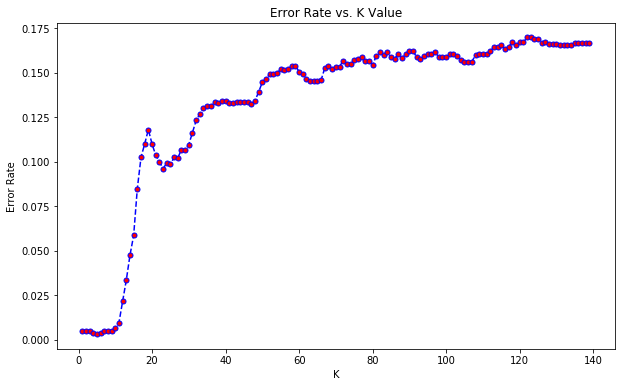

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [37]:
y_pred=dtree.predict(X_test)

In [38]:
dtree.score(X_test,y_test)

0.9784688995215312

In [39]:
dtree.score(X_train,y_train)

0.9856459330143541

In [40]:
y_pred

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

In [41]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)


In [42]:
treefeatures

array([0.02272203, 0.02986247, 0.35871102, 0.04166295, 0.05972029,
       0.23556398, 0.25175726])

In [43]:
features = data1.iloc[:,[1,2,3,4,6,16,17]]

## Tree Visualization

In [44]:

feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']

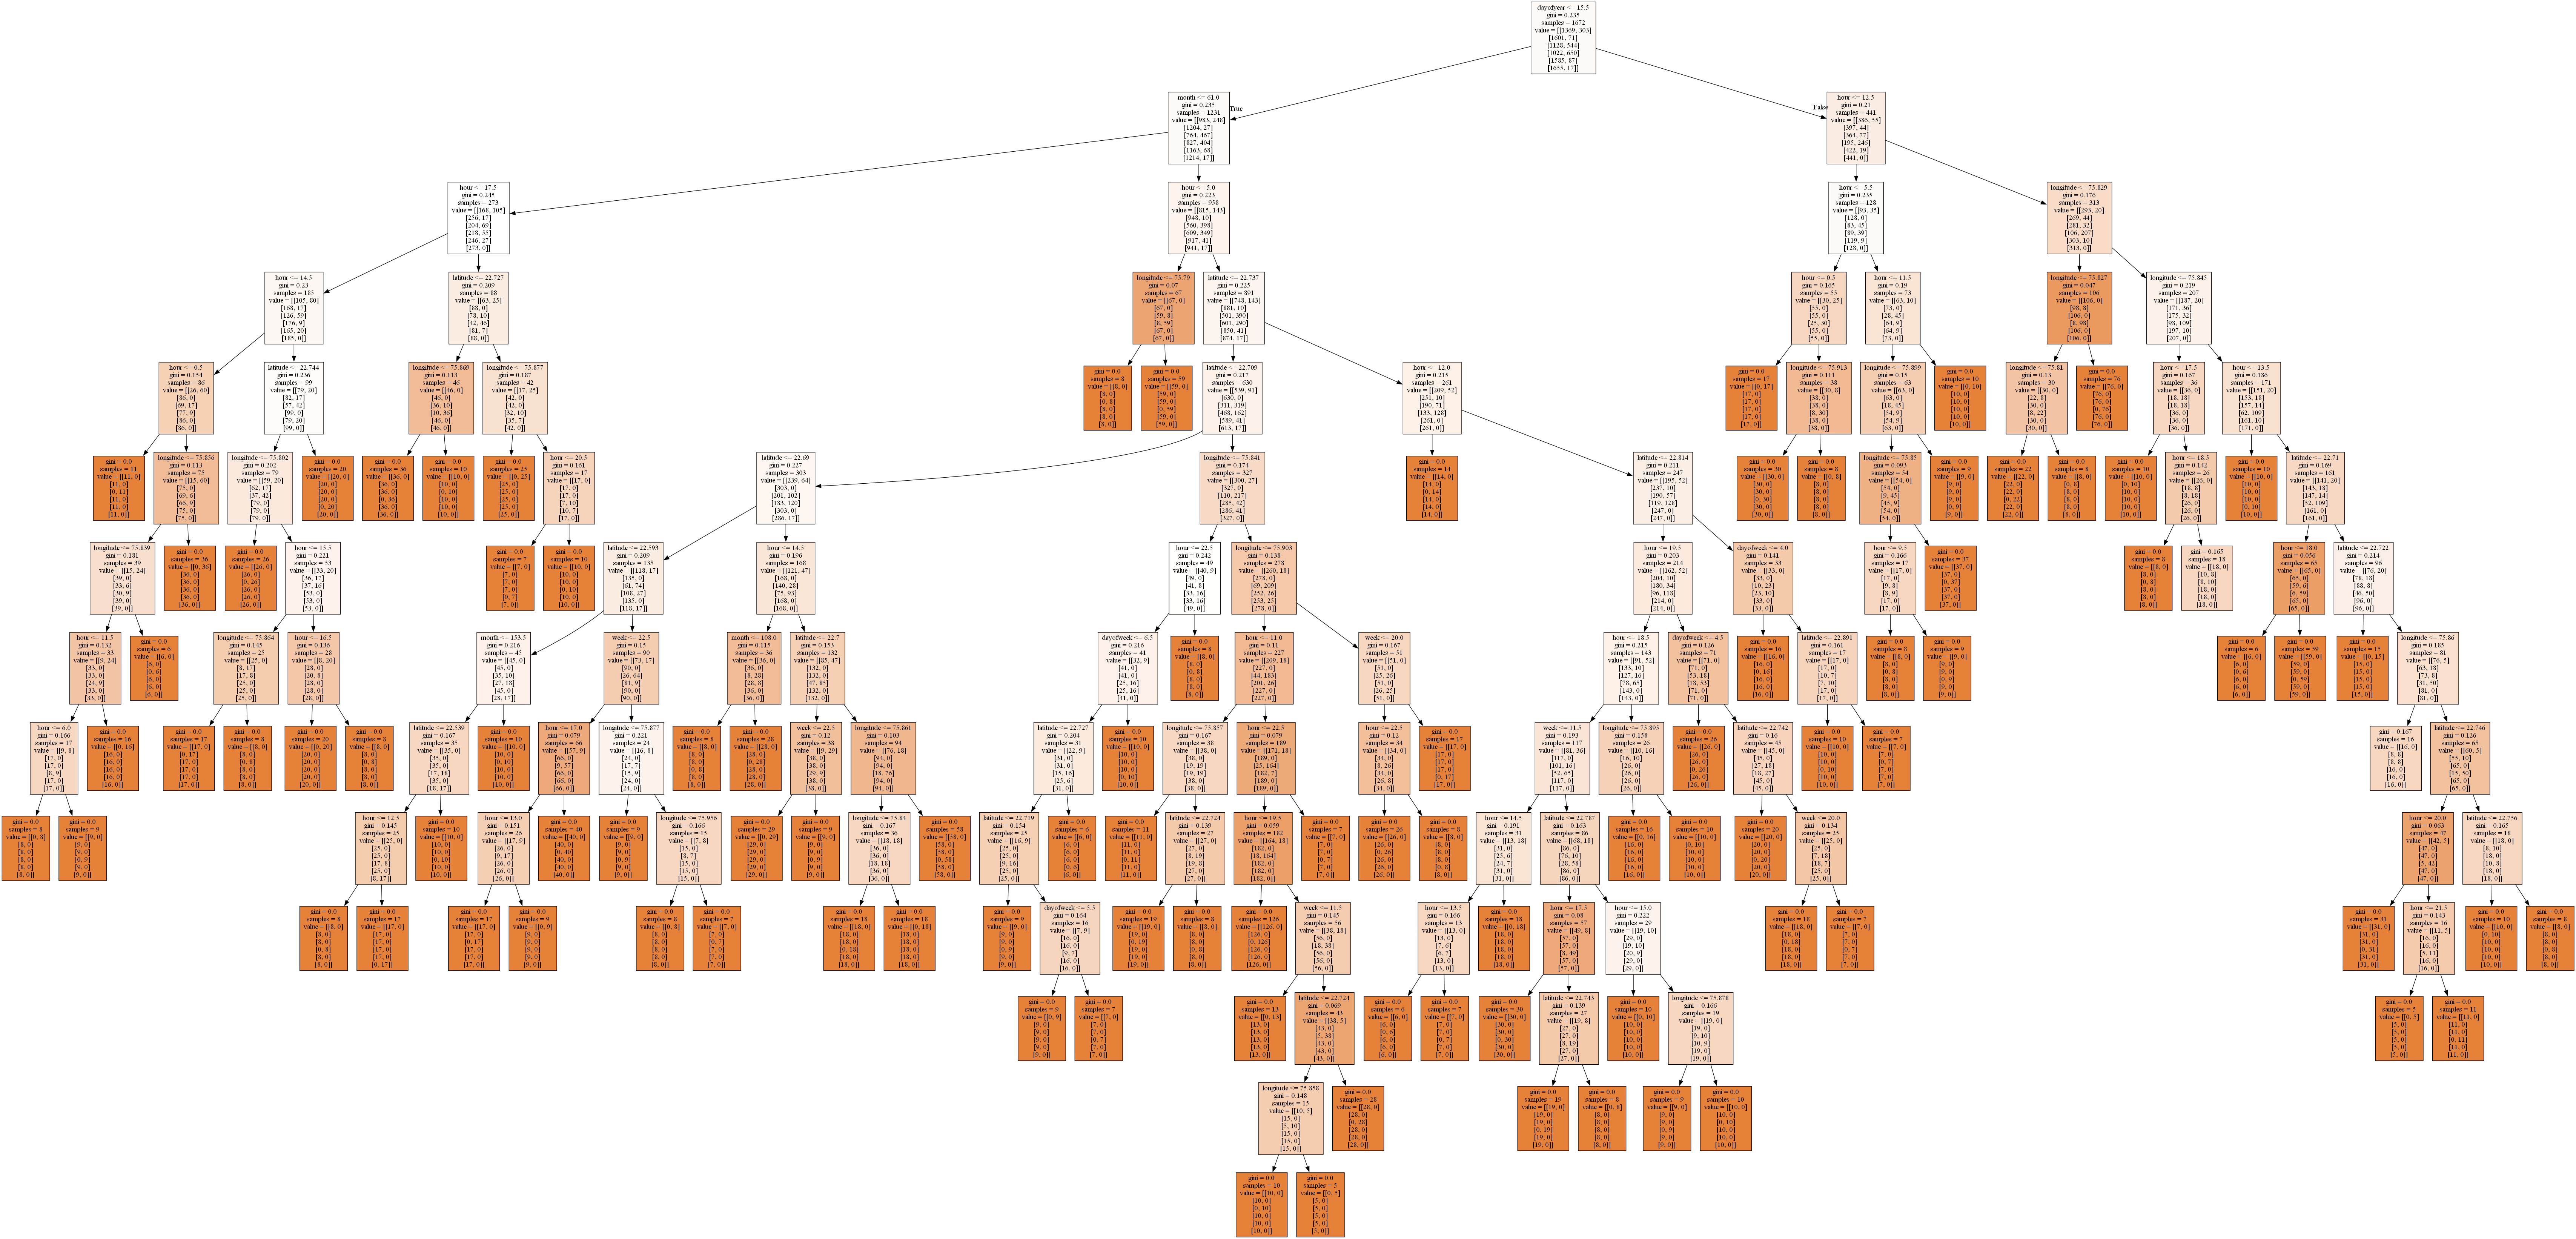

In [55]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Tree Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred=rfc.predict(X_test)

In [48]:
rfc.score(X_test,y_test)

0.9856459330143541

In [49]:
rfc.score(X_train,y_train)

0.9904306220095693

In [50]:
om=rfc.feature_importances_
indices = np.argsort(om)


In [51]:
om

array([0.03747355, 0.01953095, 0.31446572, 0.04466676, 0.03494136,
       0.28686244, 0.26205921])

In [52]:
features = data1.columns

Text(0.5, 0, 'Relative Importance')

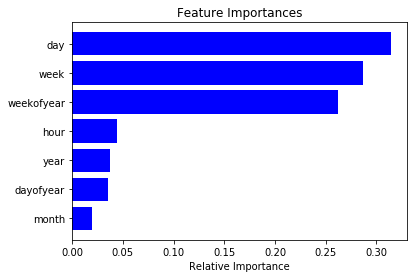

In [53]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Model Saving

In [54]:
import joblib
filename = 'model.sav'
joblib.dump(knn, filename)

['model.sav']